# Unit 5 - Financial Planning

In [1]:
# Initial imports
import os
import requests
import json
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [2]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [3]:
# Set current amount of crypto assets
my_btc = 1.2
my_eth = 5.3

In [4]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

In [5]:
# Submit request and format output
btc_url = btc_url + "?format=json"
response_data = requests.get(btc_url).json()

# Fetch current BTC price
my_btc_value = response_data['data']['1']['quotes']['USD']['price']


# Submit request and format output
eth_url = eth_url + "?format=json"
response_data = requests.get(eth_url).json()

# Fetch current ETH price 
my_eth_value = response_data['data']['1027']['quotes']['USD']['price']


# Compute current value of my crpto
eth_value = my_eth * my_eth_value
btc_value = my_btc * my_btc_value

# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${eth_value:0.2f}")

The current value of your 1.2 BTC is $54158.40
The current value of your 5.3 ETH is $17506.54


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [6]:
# Set current amount of shares
my_agg = 200
my_spy = 50

In [7]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# Create the Alpaca API object
api = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2"
)

In [13]:
# Format current date as ISO format
start = pd.Timestamp("2015-09-10", tz="America/New_York").isoformat()
end = pd.Timestamp("2021-09-10", tz="America/New_York").isoformat()

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

# Get current closing prices for SPY and AGG
# (use a limit=1000 parameter to call the most recent 1000 days of data)
df_portfolio_year = api.get_barset(
    tickers,
    timeframe,
    start = start,
    
    limit = 1000
).df

# Display sample data
df_portfolio_year.head()

AGG                                       SPY  \
                             open    high     low    close   volume    open   
time                                                                          
2017-09-22 00:00:00-04:00  109.86  109.90  109.75  109.785  1325024  249.05   
2017-09-25 00:00:00-04:00  109.85  110.04  109.82  110.025  3031529  249.14   
2017-09-26 00:00:00-04:00  109.95  110.02  109.88  109.990  2074080  249.42   
2017-09-27 00:00:00-04:00  109.67  109.75  109.60  109.668  1439682  249.88   
2017-09-28 00:00:00-04:00  109.58  109.72  109.51  109.680  1553324  249.73   

                                                                
                               high      low   close    volume  
time                                                            
2017-09-22 00:00:00-04:00  249.6300  249.020  249.42  31078666  
2017-09-25 00:00:00-04:00  249.5532  248.080  248.94  42826453  
2017-09-26 00:00:00-04:00  249.7000  248.805  249.05  36761208  
2017-09-27 00:00:00-04:00  250.4900  248.870  250.02  51473231  
2017-09-28 00:00:00-04:00  250.4400  249.630  250.34  25577234

In [14]:
# Pick AGG and SPY close prices
agg_close_price = float(df_portfolio_year["AGG"]["close"][0]) 
spy_close_price = float(df_portfolio_year["SPY"]["close"][0])

# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $109.785
Current SPY closing price: $249.42


In [15]:
# Compute the current value of shares
my_agg_value = agg_close_price * my_agg
my_spy_value = spy_close_price * my_spy

# Print current value of shares
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $12471.00
The current value of your 200 AGG shares is $21957.00


### Savings Health Analysis

In [16]:
# Set monthly household income
monthly_income = 12000

# Consolidate financial assets data

crypto = eth_value + btc_value
shares = my_agg_value + my_spy_value

amount_data = {
    "amount":[crypto,shares]
}

index_data = ["crypto", "shares"]

# Create savings DataFrame
df_savings = pd.DataFrame(amount_data, index=index_data)


# Display savings DataFrame
display(df_savings)

,amount
crypto,71664.936
shares,34428.000


<AxesSubplot:title={'center':'Composition of Personal Savings'}, ylabel='amount'>

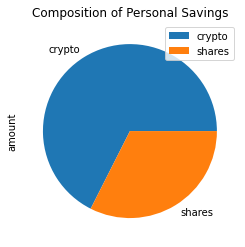

In [17]:
# Plot savings pie chart
df_savings.plot.pie(y="amount", title="Composition of Personal Savings")

In [18]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3


# Calculate total amount of savings
total_savings = float(df_savings.sum())

# Validate saving health

goal_value = emergency_fund - total_savings

if total_savings > emergency_fund:
    print("Congratulations! You have enough money in your emergency fund.")

elif total_savings == emergency_fund:
    print("Congratulations! You have reached your emergency fund goal.")

else:
    print(f"You are {goal_value} dollars away from reaching your emergency fund goal.")

Congratulations! You have enough money in your emergency fund.


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [19]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2016-05-01', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2021-05-01', tz='America/New_York').isoformat()

In [20]:
# Get 5 years' worth of historical data for SPY and AGG
# (use a limit=1000 parameter to call the most recent 1000 days of data)

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

# Get current closing prices for SPY and AGG
# (use a limit=1000 parameter to call the most recent 1000 days of data)
df_stock_data = api.get_barset(
    tickers,
    timeframe,
    start = start_date,
    end = end_date,
    limit = 1000
).df

# Display sample data
df_stock_data.head()

AGG                                       \
                             open     high       low    close   volume   
time                                                                     
2017-05-11 00:00:00-04:00  108.35  108.540  108.3435  108.515  1773499   
2017-05-12 00:00:00-04:00  108.81  108.940  108.7800  108.920  1136553   
2017-05-15 00:00:00-04:00  108.85  108.940  108.8200  108.890  1620264   
2017-05-16 00:00:00-04:00  108.88  109.101  108.8800  109.000  1394153   
2017-05-17 00:00:00-04:00  109.35  109.600  109.2800  109.560  2263851   

                              SPY                                      
                             open    high     low    close     volume  
time                                                                   
2017-05-11 00:00:00-04:00  239.35  239.57  238.13  239.410   45435690  
2017-05-12 00:00:00-04:00  239.09  239.21  238.67  239.030   35283567  
2017-05-15 00:00:00-04:00  239.47  240.44  239.45  240.245   42230620  
2017-05-16 00:00:00-04:00  240.62  240.67  239.63  240.100   37206183  
2017-05-17 00:00:00-04:00  238.10  238.64  235.75  235.850  118613594

In [21]:
# Set number of simulations
num_sims = 1000

# Configure a Monte Carlo simulation to forecast 30 years cumulative returns
MC_Daily = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.40,.60],
    num_simulation = num_sims,
    num_trading_days = 252*30
)


In [22]:
# Printing the simulation input data

MC_Daily.portfolio_data.head()

AGG                                       \
                             open     high       low    close   volume   
time                                                                     
2017-05-11 00:00:00-04:00  108.35  108.540  108.3435  108.515  1773499   
2017-05-12 00:00:00-04:00  108.81  108.940  108.7800  108.920  1136553   
2017-05-15 00:00:00-04:00  108.85  108.940  108.8200  108.890  1620264   
2017-05-16 00:00:00-04:00  108.88  109.101  108.8800  109.000  1394153   
2017-05-17 00:00:00-04:00  109.35  109.600  109.2800  109.560  2263851   

                                           SPY                           \
                          daily_return    open    high     low    close   
time                                                                      
2017-05-11 00:00:00-04:00          NaN  239.35  239.57  238.13  239.410   
2017-05-12 00:00:00-04:00     0.003732  239.09  239.21  238.67  239.030   
2017-05-15 00:00:00-04:00    -0.000275  239.47  240.44  239.45  240.245   
2017-05-16 00:00:00-04:00     0.001010  240.62  240.67  239.63  240.100   
2017-05-17 00:00:00-04:00     0.005138  238.10  238.64  235.75  235.850   

                                                   
                              volume daily_return  
time                                               
2017-05-11 00:00:00-04:00   45435690          NaN  
2017-05-12 00:00:00-04:00   35283567    -0.001587  
2017-05-15 00:00:00-04:00   42230620     0.005083  
2017-05-16 00:00:00-04:00   37206183    -0.000604  
2017-05-17 00:00:00-04:00  118613594    -0.017701

In [23]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
MC_Daily.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.998509,1.004839,0.995177,1.008563,1.002571,0.996909,1.012480,1.013292,1.004853,0.996367,...,1.007880,1.006366,0.989759,1.000646,0.999652,0.997491,0.989263,1.005086,0.999656,0.993323
2,1.011885,1.011358,1.000831,1.011613,1.007018,1.002732,1.005002,1.019333,1.005241,0.998971,...,0.995865,1.012383,0.989849,0.988795,1.004312,0.998513,0.980117,1.003535,0.994591,0.993519
3,1.009486,0.997509,1.003367,1.020794,1.007872,1.007275,1.000444,1.036716,1.017200,1.006053,...,1.002934,1.000599,0.992027,0.984582,0.989899,1.015831,0.989857,1.011636,0.990339,0.980483
4,1.004558,1.012042,0.999675,1.012437,1.019566,0.998347,0.991009,1.041637,1.031200,1.004086,...,1.011074,0.997669,1.005825,0.978993,0.980530,1.018583,0.988853,1.011400,0.978099,0.969919
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,11.868137,12.592055,48.564101,15.182091,41.691697,9.523890,20.758079,42.466460,24.555173,29.706447,...,15.968191,7.462346,17.518523,19.815900,16.828055,37.136730,35.646004,20.394967,18.517259,14.805549
7557,12.014604,12.526293,48.235868,15.199656,42.049373,9.398122,20.660129,42.572250,24.407582,29.604985,...,16.095731,7.446595,17.710543,19.646982,16.672500,37.338619,35.449967,20.243907,18.841977,14.825850
7558,12.035793,12.558748,48.075408,15.044980,41.715390,9.448349,20.466598,41.871189,24.226013,29.155047,...,16.201313,7.460277,17.597765,19.717799,16.855072,37.806983,35.319807,20.215610,18.863738,14.972259
7559,12.010388,12.577754,47.938364,14.859153,41.674564,9.490393,20.255615,42.485654,24.312559,29.322436,...,16.208212,7.523756,17.469563,19.889914,16.942924,37.784812,35.247937,20.283686,19.030288,15.060601


In [ ]:
# Plot simulation outcomes
line_plot = MC_Daily.plot_simulation()

In [ ]:
# Plot probability distribution and confidence intervals
dist_plot = MC_Daily.plot_distribution()

### Retirement Analysis

In [ ]:
# Fetch summary statistics from the Monte Carlo simulation results
sum_tbl = MC_Daily.summarize_cumulative_return()

# Print summary statistics
print(sum_tbl)

### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `$20,000` initial investment.

In [ ]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = round(sum_tbl[8]*initial_investment,2)
ci_upper = round(sum_tbl[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [ ]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower = round(sum_tbl[8]*initial_investment,2)
ci_upper = round(sum_tbl[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [ ]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
# YOUR CODE HERE!

In [ ]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
# YOUR CODE HERE!

In [ ]:
# Plot simulation outcomes
# YOUR CODE HERE!

In [ ]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!

In [ ]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!

# Print summary statistics
# YOUR CODE HERE!

In [ ]:
# Set initial investment
# YOUR CODE HERE!

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

### Ten Years Retirement Option

In [ ]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!

In [ ]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!

In [ ]:
# Plot simulation outcomes
# YOUR CODE HERE!

In [ ]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!

In [ ]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!

# Print summary statistics
# YOUR CODE HERE!

In [ ]:
# Set initial investment
# YOUR CODE HERE!

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")